# Name Prediction

We are provided with some data of Names(Male and Female). So we need to predict out model based on this data such that it should be able to predict that the given name belongs to a male or a female.

Import the required modules.

In [114]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import keras
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import RMSprop
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline

Load and store the data.

In [2]:
data_male = pd.read_table("./Data/male.txt",comment='#', names=['Name'])
data_male['M_F_P'] = "Male"
data_female = pd.read_table("./Data/female.txt",comment='#',names=['Name'])
data_female['M_F_P'] = "Female"
#data_pet = pd.read_csv("./Data/pet.txt",sep="\t+",comment='#',names=['Name','M_F_P'])

Combine both the dataframes into one.

In [41]:
data = pd.concat([data_male, data_female], ignore_index=True)

Training function of **Keras** accepts numerical data as input so we need to convert strings( names) into some numeric form.

    Accept all names into lower case.
    Find out ASCII value of each character.
    And then normalize the given data.

In [43]:
max_len = 0
nums = []
for eachName in data.Name: 
    nums.append([((ord(c)-96)/26) for c in eachName.lower()])    
    if max_len < len(eachName):
        max_len = len(eachName)

Create an empty matrix to store the data of size = (maximum_length_of_any_word) * (Total_Length)
Max. size because we need to add padding for each word to match the input nodes of our model.

In [44]:
data_x = np.zeros((len(data.Name), max_len))

Now store names(ascii values) into empty matrix.

In [45]:
for i in range(0,len(nums)):
    for j in range(0,len(nums[i])):
        data_x[i][j] = nums[i][j]

In [158]:
data_y = data.M_F_P

Divide training data and test data.

In [159]:
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.20, random_state=30)

Apply one hot coding out output data(training as well as testing).

In [161]:
encoder = LabelEncoder()
encoder.fit(y_train)
encoded_Y = encoder.transform(y_train)
# convert integers to dummy variables (i.e. one hot encoded)
train_y = keras.utils.to_categorical(encoded_Y)

In [162]:
#encoder.fit(y_train)
encoded_Y = encoder.transform(y_test)
# convert integers to dummy variables (i.e. one hot encoded)
test_y = keras.utils.to_categorical(encoded_Y)

In [163]:
test_y

array([[ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       ..., 
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.]])

## MODEL 1 

**--Total 4 layers.**
    1. Input layer - 15 Nodes. i.e. Max. length of any word.
    2. 2 hidden layers - (1st with 524 nodes and second with 1024 nodes.)
    3. output layer - 2 Nodes (Male or Female)

In [53]:
model1 = Sequential()

In [54]:
model1.add(Dense(524, activation='relu', input_shape=(15,)))
model1.add(Dense(1024, activation='relu'))
model1.add(Dense(2, activation='softmax'))

In [55]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 524)               8384      
_________________________________________________________________
dense_11 (Dense)             (None, 1024)              537600    
_________________________________________________________________
dense_12 (Dense)             (None, 2)                 2050      
Total params: 548,034
Trainable params: 548,034
Non-trainable params: 0
_________________________________________________________________


In [56]:
model1.compile(optimizer=RMSprop(),
             loss='categorical_crossentropy',
             metrics = ['accuracy'])

In [57]:
model_fit1 = model1.fit(X_train, 
          train_y, 
          batch_size=254,
          epochs=50, 
          validation_split = .2,
         verbose=2)

Train on 5084 samples, validate on 1271 samples
Epoch 1/50
0s - loss: 0.6609 - acc: 0.6220 - val_loss: 0.7111 - val_acc: 0.4642
Epoch 2/50
0s - loss: 0.6504 - acc: 0.6393 - val_loss: 0.6778 - val_acc: 0.5814
Epoch 3/50
0s - loss: 0.6371 - acc: 0.6517 - val_loss: 0.7448 - val_acc: 0.4847
Epoch 4/50
0s - loss: 0.6351 - acc: 0.6548 - val_loss: 0.6712 - val_acc: 0.6184
Epoch 5/50
0s - loss: 0.6297 - acc: 0.6613 - val_loss: 0.6712 - val_acc: 0.5972
Epoch 6/50
0s - loss: 0.6217 - acc: 0.6654 - val_loss: 0.6752 - val_acc: 0.6121
Epoch 7/50
0s - loss: 0.6149 - acc: 0.6731 - val_loss: 0.8701 - val_acc: 0.6090
Epoch 8/50
0s - loss: 0.6203 - acc: 0.6788 - val_loss: 0.6521 - val_acc: 0.6326
Epoch 9/50
0s - loss: 0.6076 - acc: 0.6794 - val_loss: 0.6621 - val_acc: 0.6050
Epoch 10/50
0s - loss: 0.6039 - acc: 0.6843 - val_loss: 0.6829 - val_acc: 0.5877
Epoch 11/50
0s - loss: 0.6032 - acc: 0.6831 - val_loss: 0.6931 - val_acc: 0.5862
Epoch 12/50
0s - loss: 0.5981 - acc: 0.6890 - val_loss: 0.6948 - val_a

In [58]:
y_hat1 = model1.predict_classes(X_test)

1504/1589 [===========================>..] - ETA: 0s

In [59]:
y_hat1

array([0, 0, 0, ..., 0, 0, 0])

In [60]:
df_pred = pd.DataFrame(y_hat1, columns=['M_F_P'])
df_test = pd.DataFrame(y_test, columns=['M_F_P'])

In [61]:
df_test[df_test['M_F_P'] == 'Female'] = 0 
df_test[df_test['M_F_P'] == 'Male'] = 1

In [62]:
pd.crosstab(y_hat1, df_test['M_F_P'])

M_F_P,0,1
row_0,,
0,955,467
1,49,118


In [63]:
test_wrong = [im for im in zip(X_test, y_hat1, df_test['M_F_P']) if im[1] != im[2]]
len(test_wrong)

516

In [64]:
model1_acc = model_fit1.history['acc']

## MODEL 2

In [65]:
model2 = Sequential()

In [66]:
model2.add(Dense(254, activation='relu', input_shape=(15,)))
#model2.add(Dense(1024, activation='relu'))
model2.add(Dense(2, activation='softmax'))

In [67]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 254)               4064      
_________________________________________________________________
dense_14 (Dense)             (None, 2)                 510       
Total params: 4,574
Trainable params: 4,574
Non-trainable params: 0
_________________________________________________________________


In [68]:
model2.compile(optimizer=RMSprop(),
             loss='categorical_crossentropy',
             metrics = ['accuracy'])

In [69]:
model_fit2 = model2.fit(X_train, 
          train_y, 
          batch_size=254,
          epochs=50, 
          validation_split = .2,
         verbose=2)

Train on 5084 samples, validate on 1271 samples
Epoch 1/50
0s - loss: 0.6641 - acc: 0.6310 - val_loss: 0.6714 - val_acc: 0.6082
Epoch 2/50
0s - loss: 0.6537 - acc: 0.6351 - val_loss: 0.6658 - val_acc: 0.6098
Epoch 3/50
0s - loss: 0.6504 - acc: 0.6395 - val_loss: 0.6642 - val_acc: 0.6184
Epoch 4/50
0s - loss: 0.6479 - acc: 0.6428 - val_loss: 0.6632 - val_acc: 0.6161
Epoch 5/50
0s - loss: 0.6458 - acc: 0.6458 - val_loss: 0.6649 - val_acc: 0.6216
Epoch 6/50
0s - loss: 0.6446 - acc: 0.6442 - val_loss: 0.6654 - val_acc: 0.6137
Epoch 7/50
0s - loss: 0.6419 - acc: 0.6475 - val_loss: 0.6630 - val_acc: 0.6121
Epoch 8/50
0s - loss: 0.6399 - acc: 0.6495 - val_loss: 0.6698 - val_acc: 0.6129
Epoch 9/50
0s - loss: 0.6387 - acc: 0.6463 - val_loss: 0.6620 - val_acc: 0.6255
Epoch 10/50
0s - loss: 0.6359 - acc: 0.6524 - val_loss: 0.6687 - val_acc: 0.6027
Epoch 11/50
0s - loss: 0.6373 - acc: 0.6509 - val_loss: 0.6618 - val_acc: 0.6255
Epoch 12/50
0s - loss: 0.6348 - acc: 0.6552 - val_loss: 0.6610 - val_a

In [70]:
y_hat2 = model2.predict_classes(X_test)

  32/1589 [..............................] - ETA: 2s

In [71]:
pd.crosstab(y_hat2, df_test['M_F_P'])

M_F_P,0,1
row_0,,
0,966,522
1,38,63


In [72]:
test_wrong = [im for im in zip(X_test, y_hat2, df_test['M_F_P']) if im[1] != im[2]]
len(test_wrong)

560

In [73]:
model2_acc = model_fit2.history['acc']

## MODEL 3

In [74]:
model3 = Sequential()

In [75]:
model3.add(Dense(1024, activation='relu', input_shape=(15,)))
model3.add(Dense(524, activation='relu'))
model3.add(Dense(1024, activation='relu'))
model3.add(Dense(2, activation='softmax'))

In [76]:
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 1024)              16384     
_________________________________________________________________
dense_16 (Dense)             (None, 524)               537100    
_________________________________________________________________
dense_17 (Dense)             (None, 1024)              537600    
_________________________________________________________________
dense_18 (Dense)             (None, 2)                 2050      
Total params: 1,093,134
Trainable params: 1,093,134
Non-trainable params: 0
_________________________________________________________________


In [77]:
model3.compile(optimizer=RMSprop(),
             loss='categorical_crossentropy',
             metrics = ['accuracy'])

In [78]:
model_fit3 = model3.fit(X_train, 
          train_y, 
          batch_size=254,
          epochs=50, 
          validation_split = .2,
         verbose=2)

Train on 5084 samples, validate on 1271 samples
Epoch 1/50
1s - loss: 0.6706 - acc: 0.6162 - val_loss: 0.6670 - val_acc: 0.6090
Epoch 2/50
1s - loss: 0.6470 - acc: 0.6477 - val_loss: 0.9806 - val_acc: 0.6090
Epoch 3/50
1s - loss: 0.6479 - acc: 0.6576 - val_loss: 0.8544 - val_acc: 0.6090
Epoch 4/50
1s - loss: 0.6425 - acc: 0.6495 - val_loss: 0.6650 - val_acc: 0.6184
Epoch 5/50
1s - loss: 0.6294 - acc: 0.6615 - val_loss: 0.8073 - val_acc: 0.6113
Epoch 6/50
1s - loss: 0.6234 - acc: 0.6741 - val_loss: 0.6763 - val_acc: 0.6176
Epoch 7/50
1s - loss: 0.6137 - acc: 0.6725 - val_loss: 0.8456 - val_acc: 0.6090
Epoch 8/50
1s - loss: 0.6102 - acc: 0.6819 - val_loss: 0.7168 - val_acc: 0.6161
Epoch 9/50
1s - loss: 0.5984 - acc: 0.6875 - val_loss: 0.6955 - val_acc: 0.6200
Epoch 10/50
1s - loss: 0.5988 - acc: 0.6906 - val_loss: 0.7931 - val_acc: 0.6121
Epoch 11/50
1s - loss: 0.5922 - acc: 0.6875 - val_loss: 0.6647 - val_acc: 0.6318
Epoch 12/50
1s - loss: 0.5846 - acc: 0.6996 - val_loss: 0.8384 - val_a

In [79]:
y_hat3 = model3.predict_classes(X_test)

1440/1589 [==========================>...] - ETA: 0s

In [80]:
pd.crosstab(y_hat3, df_test['M_F_P'])

M_F_P,0,1
row_0,,
0,977,505
1,27,80


In [81]:
test_wrong = [im for im in zip(X_test, y_hat3, df_test['M_F_P']) if im[1] != im[2]]
len(test_wrong)

532

In [82]:
model3_acc = model_fit3.history['acc']

## MODEL 4

In [83]:
model4 = Sequential()
model4.add(Dense(300, activation='relu', input_shape=(15,)))
model4.add(Dense(524, activation='relu'))
model4.add(Dense(2, activation='softmax'))

In [84]:
model4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 300)               4800      
_________________________________________________________________
dense_20 (Dense)             (None, 524)               157724    
_________________________________________________________________
dense_21 (Dense)             (None, 2)                 1050      
Total params: 163,574
Trainable params: 163,574
Non-trainable params: 0
_________________________________________________________________


In [85]:
model4.compile(optimizer=RMSprop(),
             loss='categorical_crossentropy',
             metrics = ['accuracy'])

model_fit4 = model4.fit(X_train, 
          train_y, 
          batch_size=254,
          epochs=50, 
          validation_split = .2,
         verbose=2)

Train on 5084 samples, validate on 1271 samples
Epoch 1/50
0s - loss: 0.6577 - acc: 0.6214 - val_loss: 0.6728 - val_acc: 0.5893
Epoch 2/50
0s - loss: 0.6462 - acc: 0.6459 - val_loss: 0.6853 - val_acc: 0.6137
Epoch 3/50
0s - loss: 0.6407 - acc: 0.6515 - val_loss: 0.6620 - val_acc: 0.6192
Epoch 4/50
0s - loss: 0.6339 - acc: 0.6587 - val_loss: 0.7325 - val_acc: 0.6098
Epoch 5/50
0s - loss: 0.6311 - acc: 0.6617 - val_loss: 0.7322 - val_acc: 0.6113
Epoch 6/50
0s - loss: 0.6289 - acc: 0.6603 - val_loss: 0.6751 - val_acc: 0.5759
Epoch 7/50
0s - loss: 0.6246 - acc: 0.6676 - val_loss: 0.6582 - val_acc: 0.6318
Epoch 8/50
0s - loss: 0.6194 - acc: 0.6741 - val_loss: 0.7548 - val_acc: 0.6129
Epoch 9/50
0s - loss: 0.6210 - acc: 0.6711 - val_loss: 0.6663 - val_acc: 0.6145
Epoch 10/50
0s - loss: 0.6137 - acc: 0.6725 - val_loss: 0.6668 - val_acc: 0.6239
Epoch 11/50
0s - loss: 0.6103 - acc: 0.6764 - val_loss: 0.6803 - val_acc: 0.6286
Epoch 12/50
0s - loss: 0.6062 - acc: 0.6817 - val_loss: 0.6685 - val_a

In [86]:
y_hat4 = model4.predict_classes(X_test)

 800/1589 [==============>...............] - ETA: 0s

In [87]:
pd.crosstab(y_hat4, df_test['M_F_P'])

M_F_P,0,1
row_0,,
0,893,415
1,111,170


In [88]:
test_wrong = [im for im in zip(X_test, y_hat4, df_test['M_F_P']) if im[1] != im[2]]
len(test_wrong)

526

In [89]:
model4_acc = model_fit4.history['acc']

## MODEL 5

In [99]:
model5 = Sequential()
model5.add(Dense(400, activation='relu', input_shape=(15,)))
model5.add(Dropout(0.2))
model5.add(Dense(600, activation='relu'))
model5.add(Dropout(0.2))
model5.add(Dense(2, activation='softmax'))

In [100]:
model5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 400)               6400      
_________________________________________________________________
dropout_3 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 600)               240600    
_________________________________________________________________
dropout_4 (Dropout)          (None, 600)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 2)                 1202      
Total params: 248,202
Trainable params: 248,202
Non-trainable params: 0
_________________________________________________________________


In [101]:
model5.compile(optimizer=RMSprop(),
             loss='categorical_crossentropy',
             metrics = ['accuracy'])

model_fit5 = model5.fit(X_train, 
          train_y, 
          batch_size=254,
          epochs=50, 
          validation_split = .40,
         verbose=2)

Train on 3813 samples, validate on 2542 samples
Epoch 1/50
0s - loss: 0.6668 - acc: 0.6294 - val_loss: 0.6584 - val_acc: 0.6294
Epoch 2/50
0s - loss: 0.6492 - acc: 0.6391 - val_loss: 0.6588 - val_acc: 0.6338
Epoch 3/50
0s - loss: 0.6476 - acc: 0.6470 - val_loss: 0.6543 - val_acc: 0.6353
Epoch 4/50
0s - loss: 0.6426 - acc: 0.6467 - val_loss: 0.6620 - val_acc: 0.6023
Epoch 5/50
0s - loss: 0.6394 - acc: 0.6486 - val_loss: 0.7062 - val_acc: 0.5208
Epoch 6/50
0s - loss: 0.6392 - acc: 0.6433 - val_loss: 0.6587 - val_acc: 0.6404
Epoch 7/50
0s - loss: 0.6326 - acc: 0.6549 - val_loss: 0.6662 - val_acc: 0.6078
Epoch 8/50
0s - loss: 0.6325 - acc: 0.6551 - val_loss: 0.6720 - val_acc: 0.6330
Epoch 9/50
0s - loss: 0.6290 - acc: 0.6622 - val_loss: 0.6806 - val_acc: 0.6310
Epoch 10/50
0s - loss: 0.6275 - acc: 0.6651 - val_loss: 0.6501 - val_acc: 0.6511
Epoch 11/50
0s - loss: 0.6224 - acc: 0.6709 - val_loss: 0.7202 - val_acc: 0.6282
Epoch 12/50
0s - loss: 0.6232 - acc: 0.6675 - val_loss: 0.6626 - val_a

In [102]:
y_hat5 = model5.predict_classes(X_test)

 928/1589 [================>.............] - ETA: 0s

In [103]:
test_wrong = [im for im in zip(X_test, y_hat5, df_test['M_F_P']) if im[1] != im[2]]
len(test_wrong)

605

In [104]:
pd.crosstab(y_hat5, df_test['M_F_P'])

M_F_P,0,1
row_0,,
0,636,237
1,368,348


In [105]:
model5_acc = model_fit5.history['acc']

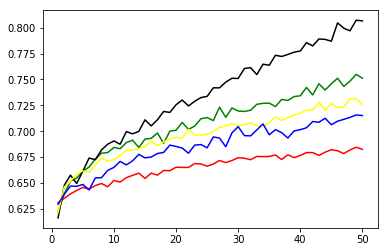

In [106]:
#plt.fig
plt.plot(range(1,51), model1_acc, color = 'green', )
plt.plot(range(1,51), model2_acc, color = 'red', )
plt.plot(range(1,51), model3_acc, color = 'black', )
plt.plot(range(1,51), model4_acc, color = 'yellow', )
plt.plot(range(1,51), model5_acc, color = 'blue', )
plt.show()

## MODEL 6

    With EarlyStop function.
    -- Stop training when a monitored quantity has stopped improving.

In [164]:
model6 = Sequential()

In [165]:
model6.add(Dense(512, activation='relu', input_shape=(15,)))
model6.add(Dense(248, activation='relu'))
model6.add(Dense(1024, activation='relu'))
model6.add(Dense(512, activation='relu'))
model6.add(Dense(2, activation='softmax'))

In [171]:
model6.compile(optimizer=RMSprop(),
             loss='categorical_crossentropy',
             metrics = ['accuracy'])

model_fit6 = model6.fit(X_train, 
          train_y,
          batch_size=254,
          epochs=50, 
          validation_split = .40,
         verbose=2, 
        callbacks = [EarlyStopping(monitor='val_acc', min_delta=0, patience=5, verbose=2, mode='min')])

Train on 3813 samples, validate on 2542 samples
Epoch 1/50
1s - loss: 0.6161 - acc: 0.6787 - val_loss: 0.6440 - val_acc: 0.6511
Epoch 2/50
0s - loss: 0.5846 - acc: 0.7047 - val_loss: 0.6822 - val_acc: 0.6208
Epoch 3/50
0s - loss: 0.5849 - acc: 0.6984 - val_loss: 0.7006 - val_acc: 0.6208
Epoch 4/50
0s - loss: 0.5715 - acc: 0.7086 - val_loss: 0.7107 - val_acc: 0.6109
Epoch 5/50
0s - loss: 0.5698 - acc: 0.7023 - val_loss: 0.9562 - val_acc: 0.5189
Epoch 6/50
0s - loss: 0.5737 - acc: 0.7076 - val_loss: 0.6825 - val_acc: 0.6467
Epoch 7/50
0s - loss: 0.5568 - acc: 0.7160 - val_loss: 0.7141 - val_acc: 0.6357
Epoch 8/50
1s - loss: 0.5633 - acc: 0.7157 - val_loss: 0.6529 - val_acc: 0.6428
Epoch 9/50
1s - loss: 0.5438 - acc: 0.7270 - val_loss: 0.6685 - val_acc: 0.6456
Epoch 10/50
1s - loss: 0.5489 - acc: 0.7210 - val_loss: 0.7109 - val_acc: 0.6459
Epoch 11/50
1s - loss: 0.5477 - acc: 0.7223 - val_loss: 0.8041 - val_acc: 0.6302
Epoch 00010: early stopping


In [172]:
model6_epoch = model_fit6.epoch

In [173]:
model6_acc = model_fit6.history['acc']
model6_val_acc = model_fit6.history['val_acc']

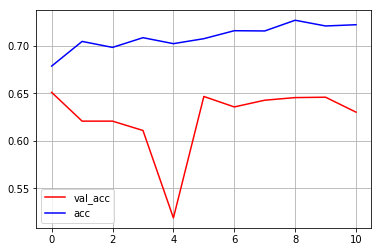

In [174]:
val_acc_line, = plt.plot(model6_epoch, model6_val_acc, color = 'red', label='val_acc')
acc_line, = plt.plot(model6_epoch, model6_acc, color = 'blue', label='acc')
plt.legend(handles=[val_acc_line, acc_line])
plt.grid()
plt.show()